# Análisis de Componentes Principales

## Análisis

````{admonition} Introducción

- El ***Análisis de Componentes Principales (PCA)*** es un método para consolidar las variables mutuamente correlacionadas de datos observados multidimensionales en nuevas variables mediante ***combinaciones lineales de las variables originales con una pérdida mínima de información en los datos observados***. 

- ***PCA permite extraer información relevante de los datos*** al fusionar múltiples variables que caracterizan a los individuos. También se puede utilizar como técnica para ***comprender visualmente las estructuras de datos*** al consolidar datos de alta dimensión en un número menor de variables, ***realizando una reducción de dimensión y proyectando los resultados en una línea unidimensional, plano bidimensional o espacio tridimensional***. 

- En este capítulo se discuten los ***conceptos básicos y el propósito de PCA en el contexto de la linealidad, así como su aplicación en la descompresión de imágenes y la descomposición de valores singulares de matrices de datos***. También se aborda el ***PCA no lineal utilizando el método del kernel*** para la extracción de información de datos multidimensionales con estructuras no lineales complejas.
````

## Concepto básico

````{figure} ./imgs/pca_3projections.png
:name: pca_3projections_fig
:align: center
:scale: 60

Proyección en tres ejes diferentes, (a), (b) y (c), y la dispersión de los datos. Fuente {cite}`konishi2014introduction`.
````

- La {numref}`pca_3projections_fig` muestra un gráfico de las puntuaciones de los exámenes de matemáticas ($x_{1}$) e inglés ($x_{2}$) de 25 estudiantes. ***Proyectando estos datos bidimensionales en un solo eje mediante la sustitución de las puntuaciones de ambas materias en la siguiente ecuación, se transforman en datos unidimensionales***.

  $$
  y=w_{1}x_{1}+w_{2}x_{2}.
  $$

- La {numref}`pca_3projections_fig` muestra la ***proyección en tres ejes diferentes, (a), (b) y (c)***. La ***dispersión de los datos*** (como medida de la varianza) para cada eje se indica mediante una ***flecha de doble cabeza*** ($\boldsymbol{\leftarrow-\rightarrow}$).

````{admonition} Observación
:class: tip

- Esta figura muestra que la varianza es mayor cuando se proyecta en el eje (b) que en el eje (a), y mayor en el eje (c) que en el eje (b). ***El eje con mayor varianza muestra con mayor claridad la separación entre los datos***. Surge la pregunta inmediata de ***cómo encontrar mejor el eje de proyección que produce la máxima varianza***. 

- En ***PCA***, utilizamos una ***secuencia de ejes de proyección con este propósito***. 
    - Primero encontramos el ***eje de proyección, conocido como el primer componente principal, que maximiza la varianza global***. 
    - Luego encontramos el ***eje de proyección que maximiza la varianza bajo la restricción de ortogonalidad al primer componente principal***. Este eje se conoce como el ***segundo componente principal***.
    - La ***ortogonalidad entre las componentes principales en PCA*** garantiza una ***representación óptima de la variabilidad de los datos***, lo que ***facilita la interpretación*** y el análisis de los mismos.
````

- Apliquemos lo mencionado en la anterior observación a datos bidimensionales. Denotamos los $n$ ***datos observados bidimensionales*** $\boldsymbol{x}=(x_{1}, x_{2})^{T}$ como

$$
\boldsymbol{x}_{1}=\begin{pmatrix}x_{11}\\x_{12}\end{pmatrix},~\boldsymbol{x}_{2}=\begin{pmatrix}x_{21}\\x_{22}\end{pmatrix},\dots,\boldsymbol{x}_{n}=\begin{pmatrix}x_{n1}\\x_{n2}\end{pmatrix}.
$$(bidimentional_data_pca)

- Estos $n$ ***datos bidimensionales se proyectan sobre*** $y=w_{1}x_{1}+w_{2}x_{2}$, y luego se expresan como

    $$
    y_{i}=w_{1}x_{i1}+w_{2}x_{i2}=\boldsymbol{w}^{T}\boldsymbol{x}_{i},~i=1,2,\dots,n,
    $$

    donde $\boldsymbol{w}=(w_{1}, w_{2})^{T}$ representa un ***vector de coeficientes***.

````{figure} ./imgs/Principal20Analysis20principal.gif
:align: center

Simulación de ***múltiples ejes de proyección*** $y=w_{1}x_{1}+w_{2}x_{2}$ en el PCA.
 ````

````{admonition} Datos proyectados repetidos?
:class: dropdown

- Es posible que los ***datos proyectados en las componentes principales sean repetidos en ciertas circunstancias***, especialmente cuando los datos originales tienen una ***alta dimensionalidad*** o cuando hay ***baja variabilidad en algunas dimensiones***. 
- Esto es importante tener en cuenta al interpretar los resultados de PCA y al realizar análisis subsiguientes. Cuando esto ocurre, puedes considerar las siguientes estrategias:

    - *Normalización de los datos*
    - *Reducción de multicolinealidad*
    - Usar *Análisis de Factores*
````

- La media de los datos $y_{1}, y_{2}, \dots, y_{n}$ que se ***proyectan sobre el eje de proyección*** es

    $$
    \overline{y}=\frac{1}{n}\sum_{i=1}^{n}y_{i}=\frac{1}{n}\sum_{i=1}^{n}(w_{1}x_{i1}+w_{2}x_{i2})=w_{1}\overline{x}_{1}+w_{2}\overline{x}_{2}=\boldsymbol{w}\overline{\boldsymbol{x}},
    $$

    donde $\overline{\boldsymbol{x}}=(\overline{x}_{1}, \overline{x}_{2})^{T}$ es el vector de medias muestrales que ***contiene como sus componentes principales la media muestral*** $\overline{x}_{j}=n^{-1}\sum_{i=1}^{n}x_{ij}~(j=1,2)$ de cada variable.

- La ***varianza*** puede ser expresada como

    $$
    \begin{align*}
    s_{y}^{2} &= \frac{1}{n}\sum_{i=1}^{n}(y_{i}-\overline{y})^{2}\\
    &= \frac{1}{n}\sum_{i=1}^{n}\left\{w_{1}(x_{i1}-\overline{x}_{1})+w_{2}(x_{i2}-\overline{x}_{2})\right\}^{2}\\
    &= w_{1}^{2}\frac{1}{n}\sum_{i=1}^{n}(x_{i1}-\overline{x}_{1})^{2}+2w_{1}w_{2}\frac{1}{n}\sum_{i=1}^{n}(x_{i1}-\overline{x}_{1})(x_{i2}-\overline{x}_{2})+w_{2}^{2}\frac{1}{n}\sum_{i=1}^{n}(x_{i2}-\overline{x}_{2})^{2}\\[1mm]
    &= w_{1}^{2}s_{11}+2w_{1}w_{2}s_{12}+w_{2}^{2}s_{22}\\[4mm]
    &= \boldsymbol{w}^{T}S\boldsymbol{w},
    \end{align*}
    $$(variance_quad_error)

    donde $S$ es la ***matriz de covarianza muestral***, definida por (`verifíquelo`)

    $$
    S=\begin{pmatrix}s_{11} & s_{12}\\s_{21} & s_{22}\end{pmatrix},~s_{jk}=\frac{1}{n}\sum_{i=1}^{n}(x_{ij}-\overline{x}_{j})(x_{ik}-\overline{x}_{k}),~j,k=1,2. 
    $$(sample_covariance_matrix)

````{admonition} Maximización de la varianza

- El problema de encontrar el vector de coeficientes $\boldsymbol{w}=(w_{1}, w_{2})^{T}$, ***que corresponde a la máxima varianza*** para los $n$ datos bidimensionales proyectados sobre $y=w_{1}x_{1}+w_{2}x_{2}$, se convierte en el ***problema de maximización de la varianza*** $S_{y}=\boldsymbol{w}^{T}S\boldsymbol{w}$ en la Ecuación {eq}`variance_quad_error` ***bajo la restricción*** $\boldsymbol{w}^{T}\boldsymbol{w}=1$. Esta restricción se aplica porque $\|\boldsymbol{w}\|$ ***sería infinitamente grande sin ella y la varianza divergiría***. 
````

- El ***problema de maximización de la varianza bajo esta restricción se puede resolver mediante el método de los multiplicadores de Lagrange***, encontrando el punto estacionario (donde la derivada se hace 0) de la función Lagrangiana.

$$
L(\boldsymbol{w}, \lambda)=\boldsymbol{w}^{T}S\boldsymbol{w}+\lambda(1-\boldsymbol{w}^{T}\boldsymbol{w})
$$

- Dado que $\partial(\boldsymbol{w}^{T}S\boldsymbol{w})/\partial\boldsymbol{w}=2S\boldsymbol{w}$ (ver Ecuación {eq}`quadratic_form_dedrivate`) y $\partial(\boldsymbol{w}^{T}\boldsymbol{w})/\partial\boldsymbol{w}=2\boldsymbol{w}$, entonces $\partial L(\boldsymbol{w}, \lambda)/\partial\boldsymbol{w}=0$ sii 

  $$
  S\boldsymbol{w}=\lambda\boldsymbol{w}.
  $$(eigen_valuesvector_problem)

- Esta solución es el ***vector propio*** $\boldsymbol{w}_{1}=(w_{11}, w_{12})^{T}$ ***correspondiente al valor propio máximo*** $\lambda_{1}$ obtenido al ***resolver la ecuación característica para la matriz de varianza-covarianza*** de la muestra $S$. Por consiguiente, ***el primer componente principal*** $y_{1}$ está dado por

  $$
  y_{1}=w_{11}x_{1}+w_{12}x_{2}=\boldsymbol{w}_{1}^{T}\boldsymbol{x}.
  $$

- La varianza del ***primer componente principal*** $y_{1}$ se alcanza con $\boldsymbol{w}=\boldsymbol{w}_{1}$, el cual maximiza la varianza de la Ecuación {eq}`variance_quad_error`, y es, por lo tanto,

  $$
  s_{y_{1}}^{2}=\boldsymbol{w}_{1}^{T}S\boldsymbol{w}_{1}=\lambda_{1}.
  $$(variance_firstpc)

- Nótese que, la {eq}`variance_firstpc` es obtenida gracias a la relación entre autovalor-autovector $S\boldsymbol{w}_{1}=\lambda_{1}\boldsymbol{w}_{1}$ de la matriz simétrica $S$, y que el vector $\boldsymbol{w}_{1}$ es normalizado a longitud 1 (`verifíquelo`).

- El ***segundo componente principal***, al proyectar los datos bidimensionales en $y=w_{1}x_{1}+w_{2}x_{2}$ bajo la ***restricción de normalización*** $\boldsymbol{w}\boldsymbol{w}^{T}=1$ junto con la ***ortogonalidad al primer componente principal***, se define como el vector de coeficientes que ***maximiza la varianza*** $S_{y_{2}}^{2}=\boldsymbol{w}^{T}S\boldsymbol{w}$ con $\boldsymbol{w}_{1}^{T}\boldsymbol{w}=0$.

- La solución, ***de la misma manera que para el primer componente principal***, se obtiene como el punto estacionario respecto a $\boldsymbol{w}$ para la función Lagrangiana

  $$
  L(\boldsymbol{w}, \lambda, \gamma)=\boldsymbol{w}^{T}S\boldsymbol{w}+\lambda(1-\boldsymbol{w}^{T}\boldsymbol{w})+\gamma\boldsymbol{w}_{1}^{T}\boldsymbol{w},
  $$

  donde $\lambda, \gamma$ son ***multiplicadores de Lagrange***.

- Cuando ***diferenciamos parcialmente*** la ecuación anterior respecto a $\boldsymbol{w}$ y establecemos el ***resultado igual a 0*** ($\partial_{\boldsymbol{w}}L=\boldsymbol{0}$), obtenemos la ecuación

  $$
  \frac{\partial L(\boldsymbol{w},\lambda, \gamma)}{\partial\boldsymbol{w}}=0\Leftrightarrow 2S\boldsymbol{w}-2\lambda w+\gamma\boldsymbol{w}_{1}=\boldsymbol{0}.
  $$(system_2nd_pc)

- Si luego ***multiplicamos a la izquierda por el vector propio*** $\boldsymbol{w}_{1}^{T}$ correspondiente al valor propio máximo $\lambda_{1}$, obtenemos

  $$
  \begin{align*}
  2\boldsymbol{w}_{1}^{T}S\boldsymbol{w}-2\lambda\textcolor{red}{\boldsymbol{w}_{1}^{T}\boldsymbol{w}}+\gamma\textcolor{red}{\boldsymbol{w}_{1}^{T}\boldsymbol{w}_{1}} &= 0\Leftrightarrow\begin{cases}\boldsymbol{w}_{1}^{T}\boldsymbol{w}&=0\\\boldsymbol{w}_{1}^{T}\boldsymbol{w}_{1}&=1\end{cases}\\
  2\textcolor{red}{\boldsymbol{w}_{1}^{T}S}\boldsymbol{w}+\gamma &= 0\Leftrightarrow (S\boldsymbol{w}_{1}=\lambda_{1}\boldsymbol{w}_{1}\Leftrightarrow\boldsymbol{w}_{1}^{T}S=\lambda_{1}\boldsymbol{w}_{1}^{T})\\[3mm] 
  2\textcolor{red}{\lambda\boldsymbol{w}_{1}^{T}}\boldsymbol{w}+\gamma &= 0\Leftrightarrow\\[3mm]
  \gamma &=0
  \end{align*}
  $$

- Entonces la Ecuación {eq}`system_2nd_pc` se convierte en

  $$
  2Sw-2\lambda\boldsymbol{w}+\gamma\boldsymbol{w}_{1}=2S\boldsymbol{w}-2\lambda\boldsymbol{2}=0\Leftrightarrow S\boldsymbol{w}=\lambda\boldsymbol{w},~\text{donde}~\begin{cases}\boldsymbol{w}_{1}^{T}\boldsymbol{w}&=0\\\boldsymbol{w}_{1}^{T}\boldsymbol{w}_{1}&=1\end{cases}
  $$(eigenvalue_problema_system_2nd_pc)

- La solución del problema de ***autovalores y autovectores*** asociado a la Ecuación {eq}`eigenvalue_problema_system_2nd_pc` entrega el par autovector/autovalor $(\lambda_{2}, \boldsymbol{w}_{2})$, donde $\boldsymbol{w}_{2}=(w_{21}, w_{22})^{T}$.

- El ***segundo componente principal*** puede ser dado por la siguiente ecuación

  $$
  y_{2}=w_{21}x_{1}+w_{22}x_{2}=\boldsymbol{w}_{2}^{T}\boldsymbol{x}
  $$

- De la relación entre el ***autovalor y el autovector de la matriz simétrica*** $S$, la varianza del segundo componente principal $y_{2}$ se convierte en $s_{y_{2}}^{2}=\boldsymbol{w}_{2}S\boldsymbol{w}_{2}=\lambda_{2}$ de la misma manera que en la Ecuación {eq}`variance_firstpc`.

- El ***PCA basado en los datos bidimensionales*** en Ecuación {eq}`bidimentional_data_pca` es esencialmente un ***problema de encontrar los autovalores y autovectores de la matriz de varianza-covarianza muestral*** $S$.

````{admonition} Observación
:class: tip

- Dado que ***cada componente principal `captura una parte única de la variabilidad en los datos`***, ***cada una contiene información diferente sobre la estructura de los datos originales***. Esto significa que, *mientras más componentes principales tengamos, más información detallada obtenemos sobre la distribución de los datos en el espacio de características*.
````

## Autovalores, Autovectores y Componentes Principales

- Denotamos los ***autovalores de la matriz de varianza-covarianza muestral*** $S$ en orden descendente según su magnitud como $\lambda_{1}\geq\lambda_{2}\geq0$, y los ***correspondientes autovectores*** mutuamente ***ortogonales normalizados a longitud 1*** como $\boldsymbol{w}_{1}=(w_{11}, w_{12})^{T}$ y $\boldsymbol{w}_{2}=(w_{21}, w_{22})^{T}$.

- Los ***primeros y segundos componentes principales*** y sus respectivas ***varianzas*** se dan entonces de la siguiente manera

  $$
  \begin{align*}
  y_{1} &= w_{11}x_{1}+w_{12}x_{2},\quad\text{var}(y_{1})=\lambda_{1}\\
  y_{2} &= w_{21}x_{1}+w_{22}x_{2},\quad\text{var}(y_{2})=\lambda_{2}
  \end{align*}
  $$

````{figure} ./imgs/first_second_pca_bidimentional.png
:align: center
:scale: 70

***Valores propios***, ***primeros y segundos componentes principales***. Fuente {cite}`konishi2014introduction`.
````

- El método de los ***multiplicadores de Lagrange***, como se utiliza en esta sección, proporciona una herramienta para ***encontrar los puntos estacionarios de funciones multivariables de valores reales*** bajo ***restricciones de igualdad y desigualdad en las variables***.

## Proceso de Derivación de Componentes Principales y Propiedades

- En general, denotamos como $\boldsymbol{x}=(x_{1}, x_{2},\dots,x_{p})^{T}$ las $p$ ***variables representando las características individuales***. Basados en los datos observados $\boldsymbol{x}_{1}, \boldsymbol{x}_{2},\dots, \boldsymbol{x}_{n}$; $p$-dimensionales, para las $p$ variables, obtenemos la ***matriz de varianza-covarianza muestral***

  $$
  S=(s_{jk})=\frac{1}{n}\sum_{i=1}^{n}(\boldsymbol{x}_{i}-\overline{\boldsymbol{x}})(\boldsymbol{x}_{i}-\boldsymbol{x})^{T}
  $$(covariance_variance_nobs_pdimentionals)

  donde $\overline{\boldsymbol{x}}$ es el vector de medias muestrales, $p$-dimensional, y $s_{jk}=\sum_{i=1}^{n}(x_{ij}-\overline{x}_{j})(x_{ik}-\overline{x}_{k})/n$ (`escriba cada componente de` $S$ `en forma matricial`).

- Siguiendo el concepto básico de la ***derivación de componentes principales***, como se describe para ***datos bidimensionales*** en la sección anterior, primero ***proyectamos los*** $n$ ***datos observados***, $p$***-dimensionales sobre el eje de proyección***

  $$
  y=w_{1}x_{1}+w_{2}x_{2}+\cdots+w_{p}x_{p}=\boldsymbol{w}^{T}\boldsymbol{x},
  $$(pdimensional_projection_pca)

  y obtenemos los ***datos unidimensionales*** $y_{i}=\boldsymbol{w}^{T}\boldsymbol{x}_{i}~(i=1,2,\dots,n;~\boldsymbol{x}_{i}~p\text{-dimensional})$.

````{figure} ./imgs/dim_red.jpeg
:align: center

````

- La ***media de los datos proyectados***, representada por $\overline{y}=n^{-1}\sum_{i=1}^{n}\boldsymbol{w}^{T}\boldsymbol{x}_{i}=\boldsymbol{w}^{T}\overline{\boldsymbol{x}}$ (`escriba el vector de componentes de` $\overline{\boldsymbol{x}}$) permite expresar la varianza como:

  $$
  \begin{align*}
  s_{y}^{2} &= \frac{1}{n}\sum_{i=1}^{n}(y_{i}-\overline{y})^{2}\\
  &= \frac{1}{n}\sum_{i=1}^{n}(\boldsymbol{w}^{T}\boldsymbol{x}_{i}-\boldsymbol{w}^{T}\overline{\boldsymbol{x}})^{2}\\
  &= \frac{1}{n}\sum_{i=1}^{n}(\boldsymbol{w}^{T}(\boldsymbol{x}_{i}-\overline{\boldsymbol{x}}))(\boldsymbol{w}^{T}(\boldsymbol{x}_{i}-\overline{\boldsymbol{x}}))^{T}\\
  &= \boldsymbol{w}^{T}\frac{1}{n}\sum_{i=1}^{n}(\boldsymbol{x}_{i}-\overline{\boldsymbol{x}})(\boldsymbol{x}_{i}-\overline{\boldsymbol{x}})^{T}\boldsymbol{w}\\
  &= \boldsymbol{w}^{T}S\boldsymbol{w}.
  \end{align*}
  $$

- De manera ***similar a lo aplicado en dos dimensiones***, el ***vector de coeficientes que maximiza la varianza de los datos proyectados*** puede expresarse como el ***autovector*** $\boldsymbol{w}_{1}$ ***correspondiente al mayor autovalor*** $\lambda_{1}$ de la ***matriz de varianza-covarianza muestral*** $S$.

- El eje de proyección $y_{1}=\boldsymbol{w}_{1}^{T}\boldsymbol{x}$ con $\boldsymbol{w}_{1}$ como vector de coeficientes es entonces el ***primer componente principal***. De la misma manera, nuevamente, la ***varianza en este eje de proyección es el mayor autovalor*** $\lambda_{1}$

- El ***segundo componente principal*** es el eje que, cumpliendo con la ***ortogonalidad al primer componente principal, maximiza la varianza de los datos proyectados*** $p$-dimensionales, y, por lo tanto, es el ***eje de proyección generado por el autovector*** $\boldsymbol{w}_{2}$, que corresponde al ***segundo mayor autovalor*** $\lambda_{2}$ de la matriz $S$

````{admonition} Observación
- Continuando de la misma manera, el ***tercer componente principal*** se define como el eje que, ***cumpliendo con la ortogonalidad al primer y segundo componente principal, maximiza la varianza de los datos proyectados*** $p$***-dimensionales***. Repitiendo sucesivamente este proceso, podemos en principio derivar $p$ ***componentes principales para las combinaciones lineales de las variables originales***.

- La ***invertibilidad de la matriz de covarianza en PCA se garantiza*** debido a la necesidad de que ***las variables originales sean linealmente independientes***, lo que conduce a una ***matriz de covarianza no singular***.
````

- Como resultado, ***PCA se convierte así en el problema de los autovalores de la matriz de varianza-covarianza muestral*** $S$, como se describe a continuación.

### El problema de los autovalores de la matriz de varianza-covarianza muestral y los componentes principales

- Denotemos $S$ como una ***matriz de varianza-covarianza muestral*** basada en $n$ ***datos observados*** $p$-dimensionales. Como se observa en la Ecuación {eq}`covariance_variance_nobs_pdimentionals`, es una ***matriz simétrica de orden*** $p$. Luego, denotamos los $p$ autovalores

  $$
  \lambda_{1}\geq\lambda_{2}\geq\cdots\lambda_{i}\geq\cdots\geq\lambda_{p}\geq0,
  $$

  dados como la ***solución a la ecuación característica*** de $S,~|S-\lambda I_{p}|=0$.  

- Además, ***denotamos los autovectores*** $p$-dimensionales ***normalizados a longitud 1*** correspondientes a estos autovalores como

  $$
  \boldsymbol{w}_{1}=
  \begin{pmatrix}
  w_{11}\\
  w_{12}\\
  \vdots\\
  w_{1p}
  \end{pmatrix},~
  \boldsymbol{w}_{2}=
  \begin{pmatrix}
  w_{21}\\
  w_{22}\\
  \vdots\\
  w_{2p}
  \end{pmatrix},\dots,
  \boldsymbol{w}_{p}=
  \begin{pmatrix}
  w_{p1}\\
  w_{p2}\\
  \vdots\\
  w_{pp}
  \end{pmatrix}
  $$

- Para estos autovectores, la ***normalización*** $\boldsymbol{w}_{i}^{T}\boldsymbol{w}_{i}=1$ para longitud del vector 1 y la ***ortogonalidad*** $\boldsymbol{w}_{i}^{T}\boldsymbol{w}_{j}=0$ (para $i\neq j$) quedan así establecidas.

- Los $p$ ***componentes principales*** y su ***varianza expresada*** en términos de la ***combinación lineal de las variables originales*** pueden ser proporcionados en orden de la siguiente manera

  $$
  \begin{align*}
  y_{1} &= w_{11}x_{1}+w_{12}x_{2}+\cdots+w_{1p}x_{p}=\boldsymbol{w}_{1}^{T}\boldsymbol{x},\quad\text{var}(y_{1})=\lambda_{1},\\
  y_{2} &= w_{21}x_{1}+w_{22}x_{2}+\cdots+w_{2p}x_{p}=\boldsymbol{w}_{2}^{T}\boldsymbol{x},\quad\text{var}(y_{2})=\lambda_{2},\\
  &\vdots\\
  y_{p} &= w_{p1}x_{1}+w_{p2}x_{2}+\cdots+w_{pp}x_{p}=\boldsymbol{w}_{p}^{T}\boldsymbol{x},\quad\text{var}(y_{p})=\lambda_{p}.
  \end{align*}
  $$(systemof_variance_principal_components)

````{admonition} Reducción de dimensión

- Al aplicar $PCA$, es posible ***reducir la dimensionalidad de los*** $n$ ***datos observados*** $p$-dimensionales

    $$
    \{\boldsymbol{x}_{i}=(x_{i1}, x_{i2}, \dots, x_{ip})^{T}:~i=1,2,\dots, n\}
    $$
    
    para las $p$ ***variables originales a un número menor***, utilizando solo los ***primeros componentes principales***; por ejemplo, a datos bidimensionales 

    $$
    \{(y_{i1}, y_{i2}):~i=1,2,\dots,n\}
    $$
    
    ***utilizando solo el primero y el segundo componente principal***, donde $y_{i1}=\boldsymbol{w}_{1}^{T}\boldsymbol{x}_{i}$, $y_{i2}=\boldsymbol{w}_{2}^{T}\boldsymbol{x}_{i}$ 

- Al ***proyectar*** así el conjunto de datos ***del espacio de dimensiones superior sobre un plano bidimensional***, podemos ***aprender visualmente la estructura de los datos***. Al encontrar el significado de las nuevas variables combinadas como combinaciones lineales de las variables originales, además, podemos ***extraer información útil***.
````

- El significado de los componentes principales puede entenderse en términos de la ***magnitud y el signo de los coeficientes*** $w_{ij}$ de cada variable. Además, la ***correlación entre los componentes principales y las variables*** como indicador cuantitativo es muy útil para ***identificar las variables que influyen en los componentes principales***. La correlación entre el $i$***-ésimo componente principal*** $y_{i}$ ***y la variable*** $x_{j}$ está dada por

  $$
  r_{y_{i}, x_{j}}=\frac{\text{cov}(y_{i}, x_{j})}{\sqrt{\text{var}(y_{i})}\sqrt{\text{var}(x_{j})}}=
  \frac{\lambda_{i}w_{ij}}{\sqrt{\lambda_{i}}\sqrt{s_{jj}}}=\frac{\sqrt{\lambda_{i}}w_{ij}}{\sqrt{s_{jj}}}
  $$

  donde $\lambda_{i}$ es la varianza del $i$***-ésimo componente principal***, $w_{ij}$ es el coeficiente de la variable $x_{j}$ para el $i$***-ésimo componente principal***, y $s_{jj}$ es la varianza de la variable $x_{j}$.

````{admonition} Observación (Reducción de dimensionalidad)

- ***`¿Cuántas componentes principales son necesarias?`***: Trazar un ***gráfico de la varianza explicada acumulativa en función del número de componentes*** y ***seleccionar el número de componentes que capturan una cantidad significativa de la varianza total*** (por ejemplo, el ***`70% o el 80%`***).

- El ***70% o 80% de varianza explicada es un umbral comúnmente utilizado en PCA*** para determinar el número de componentes principales que se deben retener en un modelo. Al ***retener el 70% o 80% de la varianza***, se ***conserva la mayor parte de la información importante en los datos originales***, y generalmente, conservar este porcentaje implica una ***reducción relevante en la dimensionalidad de los datos***.
````

````{figure} ./imgs/pca2_pca3.png
:align: center
````

## Autovalores y autovectores de una matriz simétrica

 - La matriz de ***varianza-covarianza muestral*** $S$ dada por la Ecuación {eq}`covariance_variance_nobs_pdimentionals` es una ***matriz simétrica de orden*** $p$, con la siguiente ***relación entre sus autovalores y autovectores***

   $$
   S\boldsymbol{w}_{i}=\lambda_{i}\boldsymbol{w}_{i},~\boldsymbol{w}_{i}^{T}\boldsymbol{w}_{i}=1,~\boldsymbol{w}_{i}^{T}\boldsymbol{w}_{j}=0~(i\neq j)
   $$(eigenvalue_eigenvector_relation)

   para $i,j=1,2,\dots,p$.

- Denotamos como $W$ la ***matriz de orden*** $p$ que tiene como ***columnas los*** $p$ ***autovectores***, y como $\Lambda$ la matriz de orden $p$ que tiene los ***autovalores como sus elementos diagonales***, es decir,

  $$
  W=(\boldsymbol{w}_{1}, \boldsymbol{w}_{2}, \dots, \boldsymbol{w}_{p}),~ \Lambda =
  \begin{pmatrix}
  \lambda_{1} & 0 & \cdots & 0\\
  0 & \lambda_{2} & \cdots & 0\\
  \vdots & \vdots & \ddots & \vdots\\
  0 & 0 & \vdots & \lambda_{p}
  \end{pmatrix}
  $$

- La ***relación entre los autovalores y autovectores de la matriz de varianza-covarianza muestral*** $S$ dada por Ecuación {eq}`eigenvalue_eigenvector_relation` puede expresarse de la siguiente manera:

  1. $SW=W\Lambda,\quad W^{T}W=I_{p}$
  2. $W^{T}SW=\Lambda$
  3. $S=W\Lambda W^{T}=\lambda_{1}\boldsymbol{w}_{1}\boldsymbol{w}_{1}^{T}+\lambda_{2}\boldsymbol{w}_{2}\boldsymbol{w}_{2}^{T}+\cdots+\lambda_{p}\boldsymbol{w}_{p}\boldsymbol{w}_{p}^{T}$
  4. $\text{tr}(S)=\text{tr}(W\Lambda W^{T})=\text{tr}(\Lambda)=\lambda_{1}+\lambda_{2}+\cdots+\lambda_{p}$

````{admonition} Observación

- La Ecuación (2) muestra que ***la matriz simétrica*** $S$ ***puede ser diagonalizada por la matriz ortogonal*** $W$, y la Ecuación (3) es conocida como la ***descomposición espectral de la matriz simétrica*** $S$. 

- La Ecuación (4) muestra que la suma, $\text{tr}(S)=s_{11}+s_{22}+\cdots+s_{pp}$, de las ***varianzas de las variables originales*** $x_{1}, x_{2}, \dots, x_{p}$ es ***igual a la suma***, $\text{tr}(\Lambda)=\lambda_{1}+\lambda_{2}+\cdots+\lambda_{p}$, ***de las varianzas de los*** $p$ ***componentes principales*** construidos.
````

## Estandarización y matriz de correlación muestral

````{admonition} Introducción
:class: tip

- Supongamos que, además de las ***puntuaciones en matemáticas, inglés, ciencias y japonés***, agregamos como ***quinta variable la proporción de respuestas correctas dadas para 100 problemas de cálculo*** que miden la habilidad para calcular y ***realizamos PCA basado en los datos resultantes de cinco dimensiones***. 

- En este caso, ***las unidades de medida difieren sustancialmente entre la proporción de respuestas correctas*** y las ***puntuaciones de las pruebas de materias***, por lo que ***es necesario estandarizar los datos observados***.
````

- Para los $n$ datos observados $p$ dimensionales

  $$
  \boldsymbol{x}_{i}=(x_{i1}, x_{i2}, \dots, x_{ip})^{T},\quad i=1, 2, \dots, n,
  $$(vector_pvariables_ndimensionals)

  Primero obtenemos el ***vector de media muestral*** $\overline{\boldsymbol{x}}=(\overline{x}_{1}, \overline{x}_{2}, \dots, \overline{x}_{p})^{T}$ y la ***matriz de varianza-covarianza muestral*** $S=(s_{jk})$. Estandarizamos los datos $p$-dimensionales en Ecuación {eq}`vector_pvariables_ndimensionals` de manera que

  $$
  \boldsymbol{z}_{i}=(z_{i1}, z_{i2}, \dots, z_{ip})^{T},\quad z_{ij}=\frac{x_{ij}-\overline{x}_{j}}{\sqrt{s_{jj}}},\quad j=1, 2, \dots, p.
  $$

- La **varianza muestral** ($s_{jj}^{\star}$) y la ***covarianza muestral*** ($s_{jk}^{\star}$) basadas en estos ***datos*** $p$***-dimensionales estandarizados*** se dan entonces por

  $$
  s_{jk}^{\star}=\frac{1}{n}\sum_{i=1}^{n}z_{ij}z_{ik}=\frac{1}{n}\sum_{i=1}^{n}\frac{(x_{ij}-\overline{x}_{j})(x_{ik}-\overline{x}_{k})}{\sqrt{s_{jj}}\sqrt{s_{kk}}}=\frac{s_{jk}}{\sqrt{s_{jj}}\sqrt{s_{kk}}}\equiv r_{jk}
  $$

  para $j, k=1,2,\dots,p$.

````{admonition} Observación
:class: tip

- Nótese que en la ***matriz de varianza-covarianza muestral basada en los datos estandarizados***, todos los ***elementos diagonales*** $r_{jj}$ son 1, y obtenemos la matriz $R$ con $r_{jk}$ como los elementos no diagonales, los ***coeficientes de correlación muestral entre las variables*** $j$-ésima y $k$-ésima (*matriz de correlación muestral*).
- ***PCA*** comenzando ***con datos multidimensionales estandarizados*** se convierte así en un problema de ***encontrar los autovalores y autovectores de la matriz de correlación muestral*** $R$, lo cual se realiza mediante el ***mismo proceso de derivación de componentes principales que el de PCA comenzando con una matriz de varianza-covarianza muestral***.
````

## Reducción de dimensión y pérdida de información

````{admonition} Introducción

- En $PCA$, ***la varianza proporciona una medida de información***, y, por lo tanto, ***la pérdida de información puede ser estimada cuantitativamente a partir de los tamaños relativos de las varianzas de los componentes principales***. 

- Como se muestra en Ecuación {eq}`systemof_variance_principal_components`, la ***varianza del componente principal está dada por el autovalor de la matriz de varianza-covarianza muestral***. 

- En resumen, podemos utilizar $\lambda_{1}/(\lambda_{1}+\lambda_{2}+\cdots+\lambda_{p})$ para evaluar ***qué proporción de la información contenida en las*** $p$ ***variables originales está presente en el primer componente principal*** $y_{1}$.
````

- En general, la siguiente ecuación se utiliza como ***medida de la información presente en el*** $i$-***ésimo componente principal*** $y_{i}$

  $$
  \frac{\lambda_{i}}{\lambda_{1}+\lambda_{2}+\cdots+\lambda_{p}}.
  $$

- De manera similar, el ***porcentaje de varianza explicada por los primeros*** $k$ ***componentes principales*** se calcula mediante:

$$
\frac{\lambda_{1}+\lambda_{2}+\cdots+\lambda_{k}}{\lambda_{1}+\lambda_{2}+\cdots+\lambda_{k}+\cdots+\lambda_{p}}.
$$

````{admonition} Observación
:class: tip

-  En conclusión, la ***medida cuantitativa de la información contenida en los componentes principales*** que realmente se utilizan se da por la ***relación de la suma de las varianzas de esos componentes principales a la suma de las varianzas de todos los componentes principales***, lo que sirve como ***medida de la pérdida de información***.
````

````{prf:example} Relación entre estructura de correlación y pérdida de información

- Supongamos que tenemos la ***matriz de correlación muestral*** basada en datos observados bidimensionales para las variables $x_{1}, x_{2}$

    $$
    R=\begin{pmatrix}1 & r\\r & 1\end{pmatrix}
    $$

    donde $r (> 0)$ es el ***coeficiente de correlación muestral*** entre dos variables $x_{1}$ y $x_{2}$.

- La ***ecuación característica de la matriz de correlación de muestral*** $R$ es

    $$
    |R-\lambda I_{2}|=(1-\lambda)^{2}-r^{2}=\lambda^{2}-2\lambda+1-r^{2}=0.
    $$

- Sus soluciones son $\lambda_{1}=1+r$ y $\lambda_{2}=1 - r$, y los ***correspondientes autovectores*** son entonces $\boldsymbol{w}_{1} = (1/\sqrt{2}, 1/\sqrt{2})^{T}$ y $\boldsymbol{w}_{2} = (-1/\sqrt{2}, 1/\sqrt{2})^{T}$, respectivamente. 

- Los ***componentes principales primero y segundo*** obtenidos a partir de la matriz de correlación de la muestra vienen dadas, por tanto, por

    $$
    y_{1}=\frac{1}{\sqrt{2}}x_{1}+\frac{1}{\sqrt{2}}x_{2},\quad y_{2}=-\frac{1}{\sqrt{2}}x_{1}+\frac{1}{\sqrt{2}}x_{2}
    $$

- Las ***contribuciones del primer y segundo componentes principales son***, respectivamente,

    $$
    \frac{\lambda_{1}}{\lambda_{1}+\lambda_{2}}=\frac{1+r}{2},\quad\frac{\lambda_{2}}{\lambda_{1}+\lambda_{2}}=\frac{1-r}{2}.
    $$
````

- Como se muestra en la Figura {numref}`exercise_two_pca_rgiven_fig`, la contribución del primer componente principal, y, por lo tanto, la ***proporción que puede ser explicada únicamente por el primer componente principal, aumenta con la correlación creciente entre las dos variables***.

````{figure} ./imgs/exercise_two_pca_rgiven.png
:name: exercise_two_pca_rgiven_fig
:align: center
:scale: 70

Componentes principales basados en la ***matriz de correlación muestral y sus contribuciones***. Fuente {cite}`konishi2014introduction`.
````

## Implementación

- Hasta este momento, hemos analizado en detalle ***estimadores de aprendizaje supervisado***: aquellos estimadores que ***predicen etiquetas basadas en datos de entrenamiento etiquetados***. Ahora, empezamos a examinar varios ***estimadores no supervisados***, los cuales pueden resaltar aspectos interesantes de los datos sin hacer referencia a etiquetas conocidas.

- En esta sección, exploramos lo que posiblemente es uno de los ***algoritmos no supervisados más ampliamente utilizados***: el ***análisis de componentes principales (PCA)***. PCA es fundamentalmente un ***algoritmo de reducción de dimensionalidad***, pero también puede ser útil como ***herramienta de visualización, para filtrado de ruido, extracción y construcción de características, y mucho más***. 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Introducción al análisis de componentes principales

El `análisis de componentes principales (PCA)` es una `técnica no supervisada, rápida y adaptable`, diseñada para `reducir la dimensionalidad de los datos`. La forma más sencilla de comprender su funcionamiento es a través del `examen de un conjunto de datos bidimensional`. Tomemos en consideración la `recopilación posterior de 200 puntos de datos`

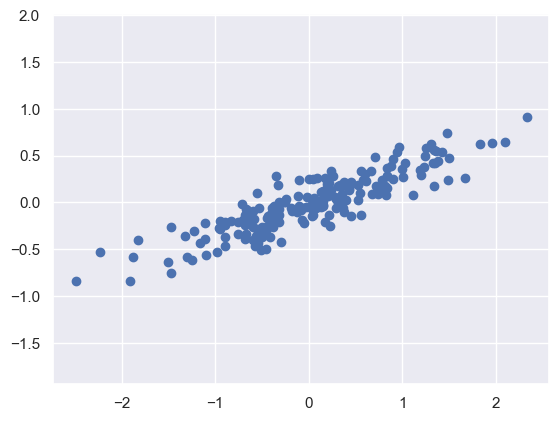

In [3]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

- Visualmente, es evidente que `existe una conexión casi lineal entre las variables` $x$ e $y$. En lugar de intentar predecir los valores de $y$ basándose en los valores de $x$, el objetivo del `aprendizaje no supervisado` aquí es `comprender la conexión entre los valores` de $x$ e $y$.

- El `análisis de componentes principales (PCA) cuantifica esta conexión` identificando los `ejes principales` dentro de los datos y `utilizándolos para representar el conjunto de datos`. Para realizar esto utilizando el estimador `PCA` de `scikit-learn`, siga estos pasos:

In [4]:
from sklearn.decomposition import PCA

In [5]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

- El proceso de ajuste `extrae información crucial de los datos`, principalmente los `"componentes"` y la `"varianza explicada"`.

In [6]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [7]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


- Para comprender el significado de estos valores, podemos `representarlos visualmente como vectores situados sobre los datos de entrada`. En esta representación, los `"componentes" determinan la dirección del vector`, mientras que la `"varianza explicada" determina el cuadrado de la longitud del vector`.

In [8]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color='r')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

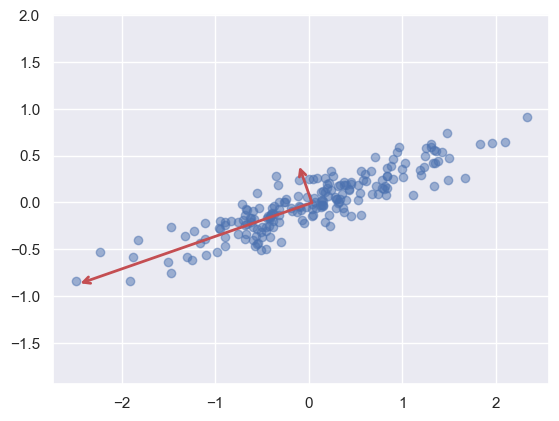

In [9]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

```{prf:observation}
- Estos vectores simbolizan las `orientaciones primarias de los datos`, y `la longitud del vector` indica la `importancia de esa orientación para explicar la distribución de los datos`. Esta longitud `cuantifica la varianza de los datos cuando se proyectan sobre esa orientación`. La proyección de los puntos de datos sobre estas orientaciones principales se denomina `"componentes principales"` de los datos.
```

### PCA para reducción de dimensión

- El `PCA` puede emplearse para `reducir la dimensionalidad anulando uno o varios de los componentes principales más pequeños`. De este modo se obtiene una `representación de los datos de menor dimensión, conservando al mismo tiempo la mayor varianza posible` de los datos. A continuación se muestra un ejemplo de utilización de `PCA com` transformación para la reducción de la dimensionalidad`

In [10]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


- Los `datos se han transformado y ahora existen en una sola dimensión`. Para `comprender las implicaciones de esta reducción` de la dimensionalidad, podemos invertir el proceso de transformación en estos datos reducidos y luego `compararlos con los datos iniciales trazándolos juntos`

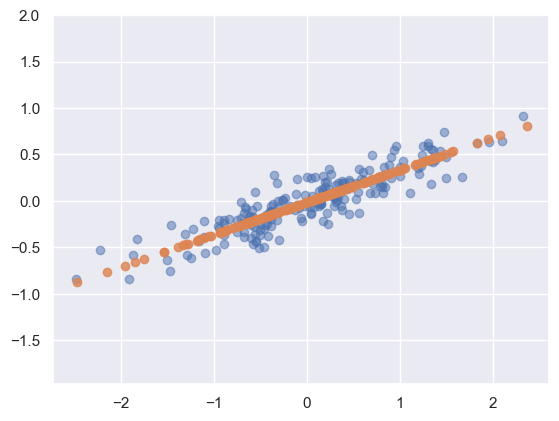

In [11]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

- Los `puntos más claros en azul` representan los datos iniciales, mientras que los `más oscuros en salmon` representan la `versión proyectada`. Esta comparación visual `aclara el concepto que subyace a la reducción de la dimensionalidad de PCA`: consiste en `eliminar los datos a lo largo del eje o ejes principales menos significativos, conservando únicamente el componente o componentes con mayor varianza`.

- El `grado de reducción de la varianza` (relacionado con la dispersión de los puntos alrededor de la línea en la figura) indica aproximadamente el `grado de "información" descartada en esta reducción de la dimensionalidad`. A pesar de que `la dimensionalidad se ha reducido a la mitad`, este nuevo conjunto de datos es, en varios aspectos, `suficientemente eficaz para captar las conexiones primarias entre los puntos de datos`. Las relaciones fundamentales entre los puntos de datos se conservan en gran medida.

### PCA para visualización: Dígitos escritos a mano

- El valor de `reducir la dimensionalidad puede no ser del todo evidente en sólo dos dimensiones`, pero se hace mucho más evidente cuando se trata de `datos de alta dimensionalidad`. Para ilustrarlo, examinaremos la aplicación de `PCA` al conjunto de datos de `dígitos escritos a mano` (imágenes $8\times8$ (64-dimensional) de píxeles enteros en el rango $0,\dots,16$.).

In [12]:
from sklearn.datasets import load_digits
from distinctipy import distinctipy

In [13]:
digits = load_digits(as_frame=True)

In [14]:
digits.data.shape

(1797, 64)

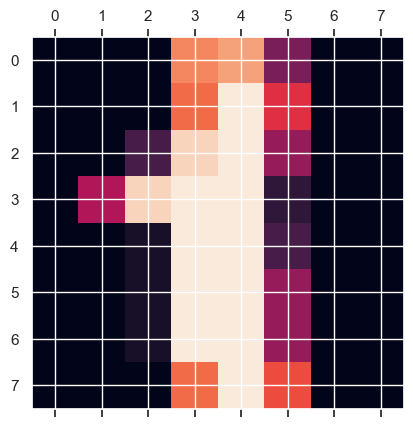

In [15]:
plt.matshow(digits.images[1]);

In [16]:
digits.images[1]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [17]:
digits.data.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [18]:
digits.data.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [19]:
digits.data.isna().any().any()

False

In [20]:
color_bars = ['black', 'red', 'green', 'blue', 'cyan', 'purple', 'orange', 'pink', 'brown', 'yellow']

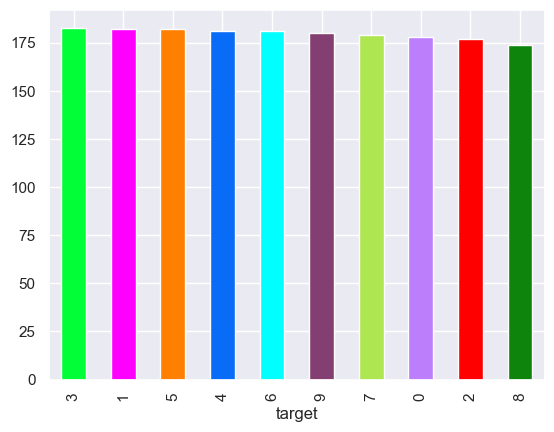

In [21]:
digits.target.value_counts().plot(kind='bar', color=distinctipy.get_colors(10));

- Para `comprender mejor las conexiones entre estos puntos`, podemos utilizar el `PCA para condensarlos en un número de dimensiones más manejable`, por ejemplo, `dos dimensiones (proyectar de 64 a 2 dimensiones)`

In [22]:
import pandas as pd

In [23]:
pca = PCA(2)
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


- El `trazado de los dos componentes principales iniciales` de cada punto nos permite `extraer información de los datos`.

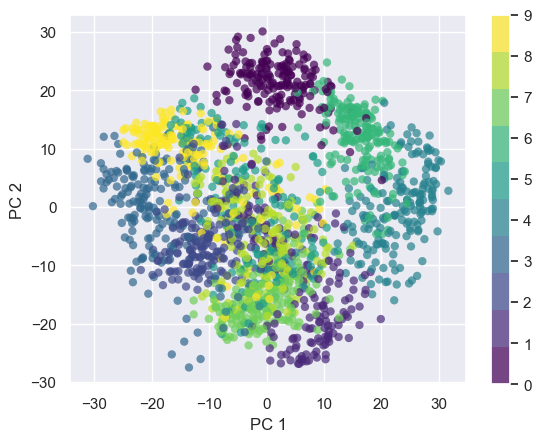

In [24]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.7,
            cmap=plt.cm.get_cmap('viridis', 10));
plt.xlabel('PC 1');
plt.ylabel('PC 2');
plt.colorbar();

```{prf:observation}
- Consideremos la `importancia de estos componentes`: el conjunto completo de datos forma una `nube de puntos de 64 dimensiones`, y estos puntos concretos representan la `proyección de cada punto de datos a lo largo de las direcciones con mayor varianza`. 

- Fundamentalmente, hemos`identificado el estiramiento y la rotación más eficaces en el espacio de 64 dimensiones`, lo que nos permite `observar la disposición de los dígitos en dos dimensiones`. Y lo que es más importante, esto se ha logrado `de forma no supervisada`, sin utilizar ninguna etiqueta.
```

- El PCA puede conceptualizarse como la selección de `funciones base óptimas`. La `combinación de sólo un pequeño subconjunto de estas funciones basta para reconstruir eficazmente la mayoría de los elementos del conjunto de datos`. Los componentes principales, que sirven de representación condensada de los datos en dimensiones inferiores, son esencialmente los `coeficientes que escalan cada elemento de esta serie`. `PCA` nos permite `recuperar las características más destacadas de la imagen de entrada` ¡con sólo una media más ocho componentes! La cantidad de cada píxel en cada componente es el corolario de la `orientación del vector en nuestro ejemplo bidimensional`.

### Selección del número de componentes

- Un aspecto esencial de la aplicación práctica del `PCA` consiste en `determinar el número óptimo de componentes necesarios para caracterizar los datos`. Esto puede lograrse analizando la `proporción de varianza explicada acumulativa en relación con el número de componentes`

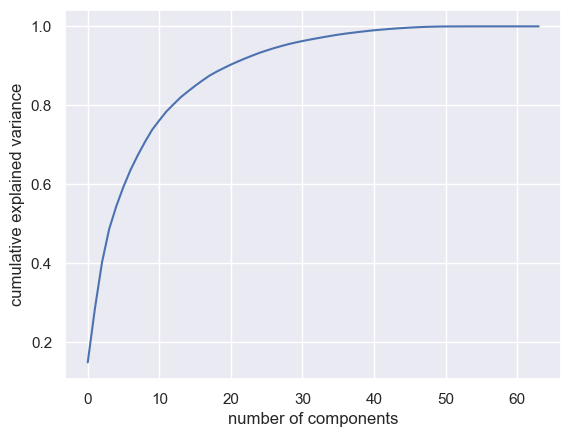

In [25]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

- La curva presentada proporciona una `medida de qué parte de la varianza total`, que abarca `64 dimensiones`, queda englobada por los $N$ `componentes iniciales`. Por ejemplo, en el `caso de los dígitos, los 10 componentes iniciales representan aproximadamente el 75\% de la varianza`, mientras que se necesitan unos `50 componentes para describir casi el 100\% de la varianza`.

- De ello se desprende que nuestra `proyección bidimensional conlleva una pérdida significativa de información`, como demuestra la varianza explicada. Para `conservar aproximadamente el 90\% de la varianza, serían necesarios unos 20 componentes`. El análisis de este gráfico para un conjunto de datos con dimensiones elevadas ayuda a `comprender el grado de redundancia presente en numerosas observaciones`.

### PCA como filtro de ruido

- El PCA puede servir como técnica para `filtrar el ruido de los datos`. El concepto fundamental es que los ***`componentes con una varianza significativamente mayor que el impacto del ruido, están menos influidas por éste`***. Por consiguiente, si se reconstruyen los datos utilizando el `subconjunto primario de componentes principales con la mayor varianza, se conserva efectivamente la señal al tiempo que se elimina el ruido`.

- Para observar esto en acción con el conjunto de datos de `dígitos`, empezaremos generando `gráficos para varias instancias de los datos originales libres de ruido`

In [26]:
digits = load_digits()

In [27]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest', clim=(0, 16))

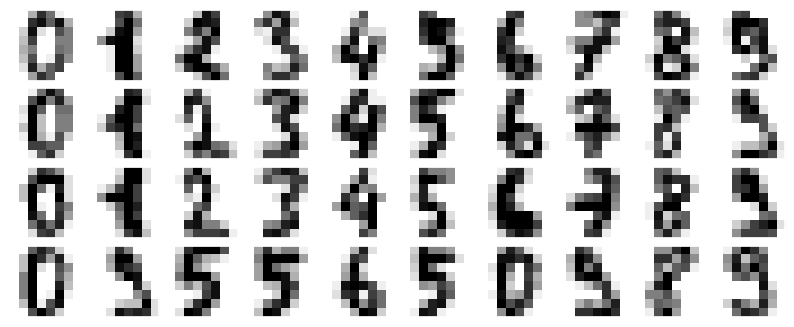

In [28]:
plot_digits(digits.data)

- Ahora, `introduciremos ruido aleatorio para generar un conjunto de datos con ruido` y, a continuación, `volveremos a crear los gráficos`

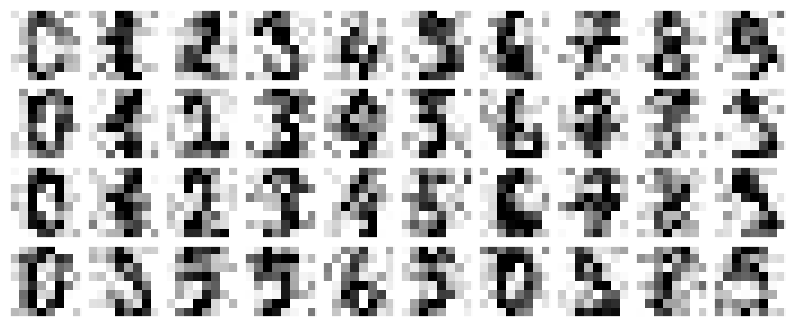

In [29]:
np.random.seed(42)
noisy = np.random.normal(loc=digits.data, scale=4)
plot_digits(noisy)

- Las imágenes muestran un `ruido evidente e incluyen píxeles erróneos`. Procederemos entrenando un `PCA sobre los datos ruidosos`, especificando que `la proyección debe mantener el 50% de la varianza`

In [30]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

- En este caso, el `50% de la varianza corresponde a 12 componentes principales`. Para proceder, `calculamos estos componentes` y posteriormente utilizamos la `inversa del proceso de transformación para reconstruir los dígitos filtrados`

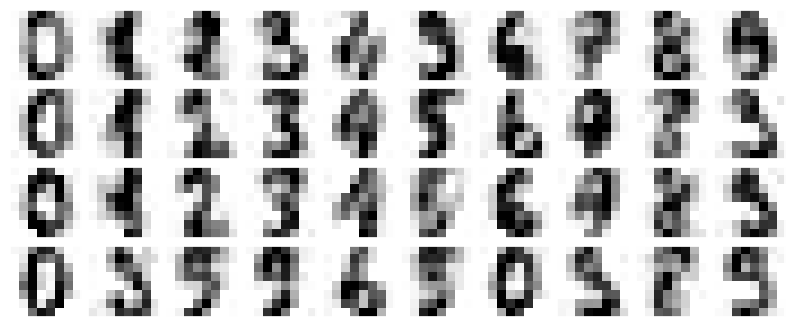

In [31]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

- La `capacidad de PCA para retener señales y filtrar el ruido la convierte en una técnica muy valiosa para la selección de características`. Por ejemplo, `en lugar de entrenar un clasificador en datos con numerosas dimensiones`, se puede optar por `entrenar el clasificador en la representación de dimensiones reducidas, que elimina intrínsecamente el ruido aleatorio` de las entradas.

### Ejemplo Eigenfaces

- Examinamos la utilización de una `proyección PCA` como `selector de características` en el contexto del `reconocimiento facial`. Profundicemos en los detalles, trabajado con el conjunto de datos `Labeled Faces in the Wild` proporcionado por `scikit-learn`

In [32]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


- `min_faces_per_person=60` asegura que ***solo se incluyan personas con al menos 60 imágenes disponibles*** en el conjunto de datos. `(1348, 62, 47)` está asociado con el ***shape de las imágenes de los rostros en el conjunto de datos***. Indica que hay ***1348 imágenes en total***. ***Cada imagen tiene dimensiones de 62 píxeles de alto por 47 píxeles de ancho***. Esto significa que cada imagen tiene una ***resolución de 62x47 píxeles*** y que hay ***1348 imágenes en total*** en el conjunto de datos.

- A continuación `examinaremos los ejes principales que engloban este conjunto de datos`. Debido a su `considerable tamaño`, emplearemos `randomized PCA`. Este enfoque emplea una `técnica aleatoria para aproximar rápidamente los` $N$ `componentes principales iniciales`, lo que resulta especialmente ventajoso para datos de gran dimensión, como éste, con casi `3.000 dimensiones. Nos centraremos en los primeros 150 componentes`

In [33]:
pca = PCA(150, svd_solver='randomized')
pca.fit(faces.data)

PCA(n_components=150, svd_solver='randomized')

- En este caso, resulta interesante `representar visualmente las imágenes correspondientes a los componentes principales iniciales`. Formalmente denominados `"vectores propios"`, estos componentes suelen denominarse `"caras propias" cuando se trata de imágenes`. Como se muestra en la figura, estas caras propias tienen un aspecto bastante inquietante

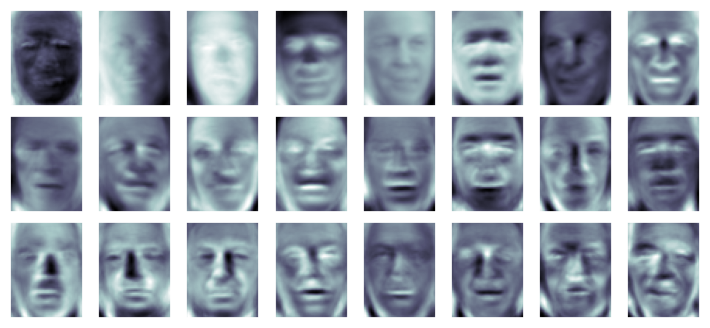

In [34]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

- Nótese que las `caras propias iniciales` (empezando por la parte superior izquierda) parecen estar ***`relacionadas con el ángulo de iluminación de la cara`***, mientras que los ***`vectores principales posteriores empiezan a aislar rasgos específicos como los ojos, la nariz y los labios`***. Examinemos ahora la `varianza acumulada asociada a estos componentes` para calibrar hasta qué punto la proyección conserva la información de los datos

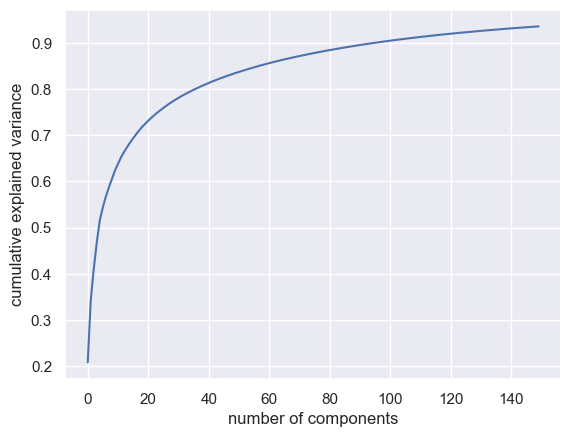

In [35]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

- Se observa que estos `150 componentes abarcan algo más del 90% de la varianza`. Esto sugiere que, utilizando estos 150 componentes, `probablemente recuperaríamos la mayoría de los atributos críticos de los datos`. Para consolidar esta idea, podemos `comparar las imágenes de entrada originales con las imágenes reconstruidas utilizando estos 150 componentes`

In [36]:
pca = PCA(150, svd_solver='randomized').fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

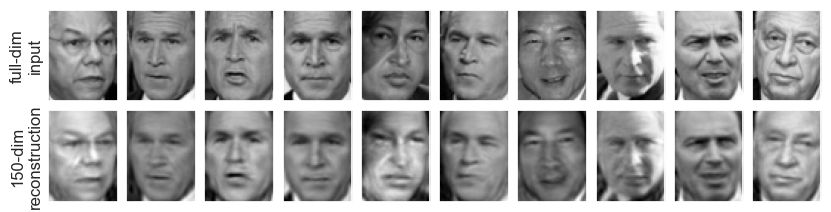

In [37]:
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

- Las imágenes de la `fila superior representan la entrada original`, mientras que la `fila inferior muestra imágenes reconstruidas utilizando sólo 150 de las aproximadamente 3.000 características iniciales`. Esta visualización ilustra eficazmente por qué la selección de características PCA, logra un éxito significativo.

- A pesar de `reducir significativamente la dimensionalidad` de los datos en aproximadamente un factor de 20, `las imágenes proyectadas conservan suficiente información para que podamos reconocer a los individuos` en las imágenes mediante inspección visual.

- Esto implica que nuestro `algoritmo de clasificación puede entrenarse con datos de 150 dimensiones en lugar de con datos de 3.000 dimensiones`. Dependiendo del algoritmo específico elegido, esto puede conducir a una `clasificación mucho más eficiente`.